In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [129]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [131]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [132]:
x = df.isnull()
x.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

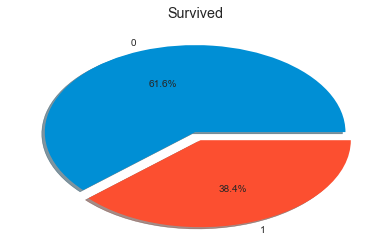

In [133]:
y = df['Survived'].value_counts()
labels = 0,1
plt.pie(y,explode=[0,0.1],labels=labels,autopct='%1.1f%%',shadow=True)
plt.title('Survived')

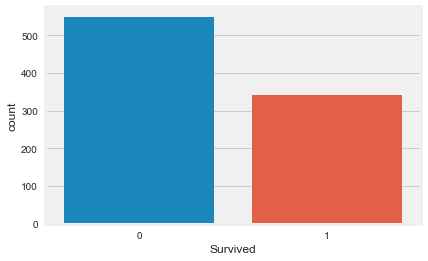

In [134]:
sns.countplot('Survived',data=df)

In [135]:
plt.style.use('fivethirtyeight')
pd.crosstab(df['Sex'],df['Survived'],margins=True,).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


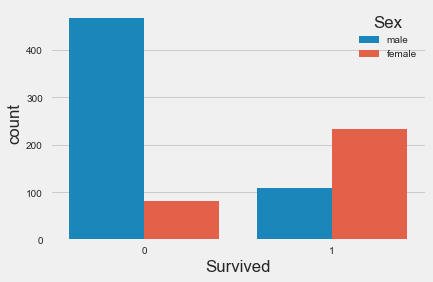

In [136]:
sns.countplot('Survived',data=df,hue='Sex')

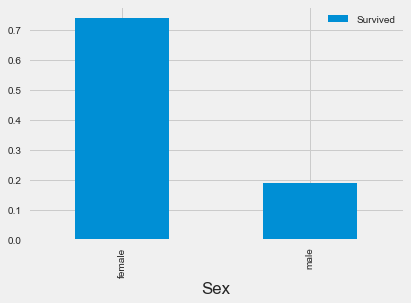

In [137]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

In [138]:
pd.crosstab(df['Pclass'],df['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


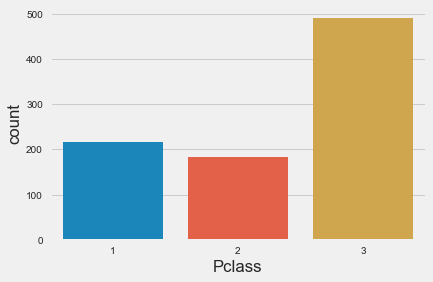

In [139]:
sns.countplot('Pclass',data=df)

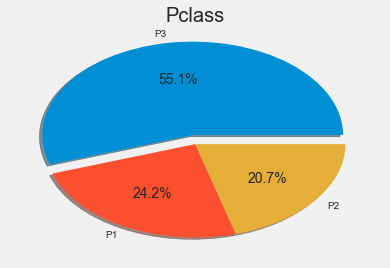

In [140]:
z = df['Pclass'].value_counts()
labels = 'P3','P1','P2'
plt.pie(z,explode=[0.1,0,0],labels=labels,autopct='%1.1f%%',shadow=True)
plt.title('Pclass')

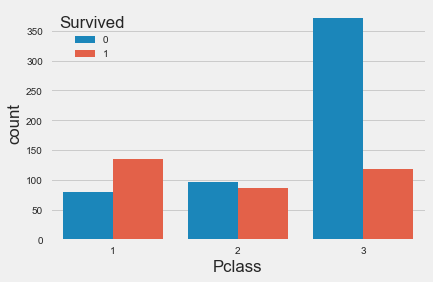

In [141]:
sns.countplot('Pclass',hue='Survived',data=df)

In [142]:
pd.crosstab([df['Sex'],df['Survived']],df['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

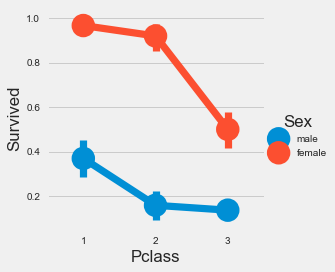

In [143]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)

In [144]:
print('Oldest person:',df['Age'].max(),'yrs')
print('Youngest person:',df['Age'].min(),'yrs')
print('Avg Age:',df['Age'].mean(),'yrs')

Oldest person: 80.0 yrs
Youngest person: 0.42 yrs
Avg Age: 29.69911764705882 yrs


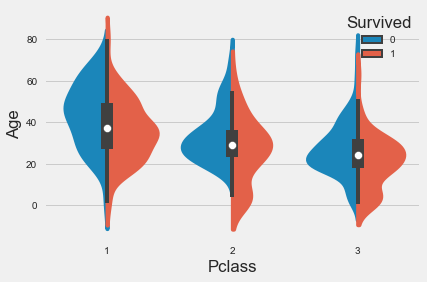

In [145]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df,split=True)

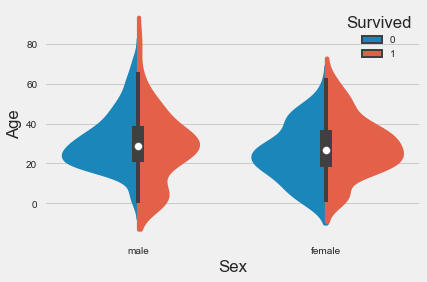

In [146]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

In [147]:
df['init'] = 0
for i in df:
    df['init']=df.Name.str.extract('([A-Za-z]+)\.')

In [148]:
pd.crosstab(df['init'],df['Sex']).T.style.background_gradient(cmap='summer_r')

init,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [149]:
df['init'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [150]:
df.groupby('init')['Age'].mean()

init
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [151]:
df.loc[(df.Age.isnull())&(df.init=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.init=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.init=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.init=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.init=='Other'),'Age']=46

In [152]:
df['Age'].isnull().any()

False

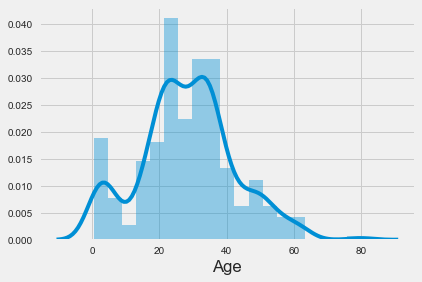

In [153]:
sns.distplot(df[df['Survived']==1]['Age'])

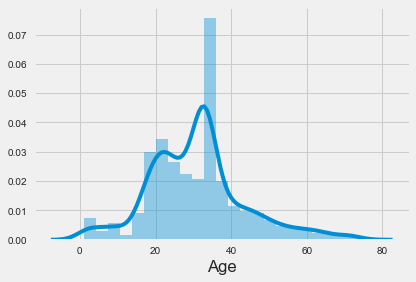

In [154]:
sns.distplot(df[df['Survived']==0]['Age'])

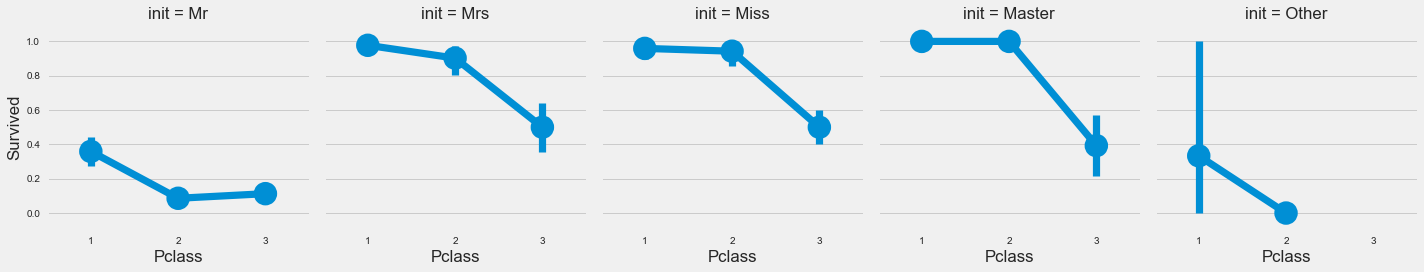

In [155]:
sns.factorplot('Pclass','Survived',col='init',data=df)

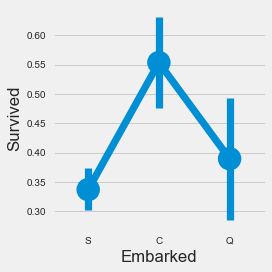

In [156]:
sns.factorplot('Embarked','Survived',data=df)

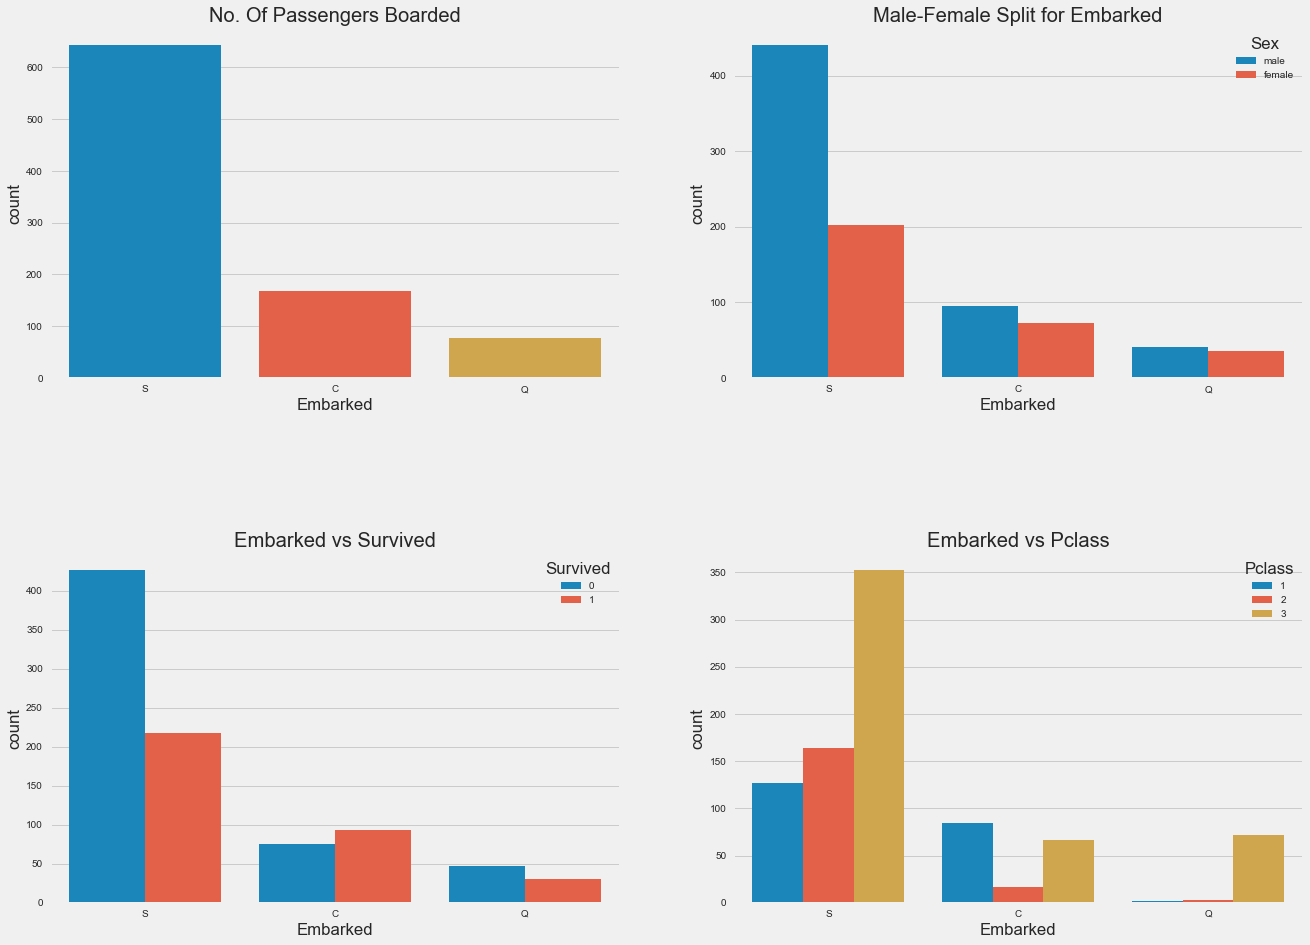

In [157]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

In [158]:
df['Embarked'].fillna('S',inplace=True)

In [159]:
df['Embarked'].isnull().any()

False

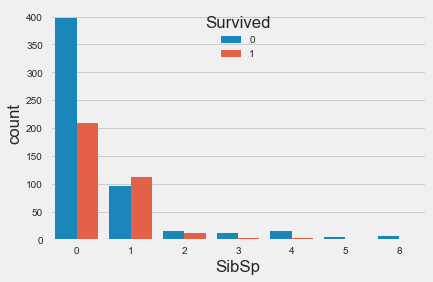

In [160]:
sns.countplot('SibSp',hue='Survived',data=df)

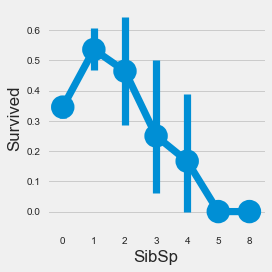

In [161]:
sns.factorplot('SibSp','Survived',data=df)

In [162]:
pd.crosstab(df['SibSp'],df['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [163]:
pd.crosstab(df['Parch'],df['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


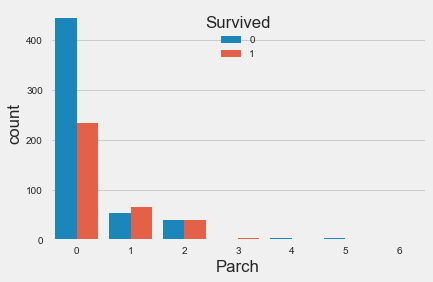

In [164]:
sns.countplot('Parch',hue='Survived',data=df)

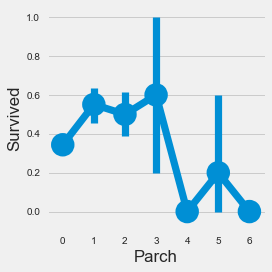

In [165]:
sns.factorplot('Parch','Survived',data=df)

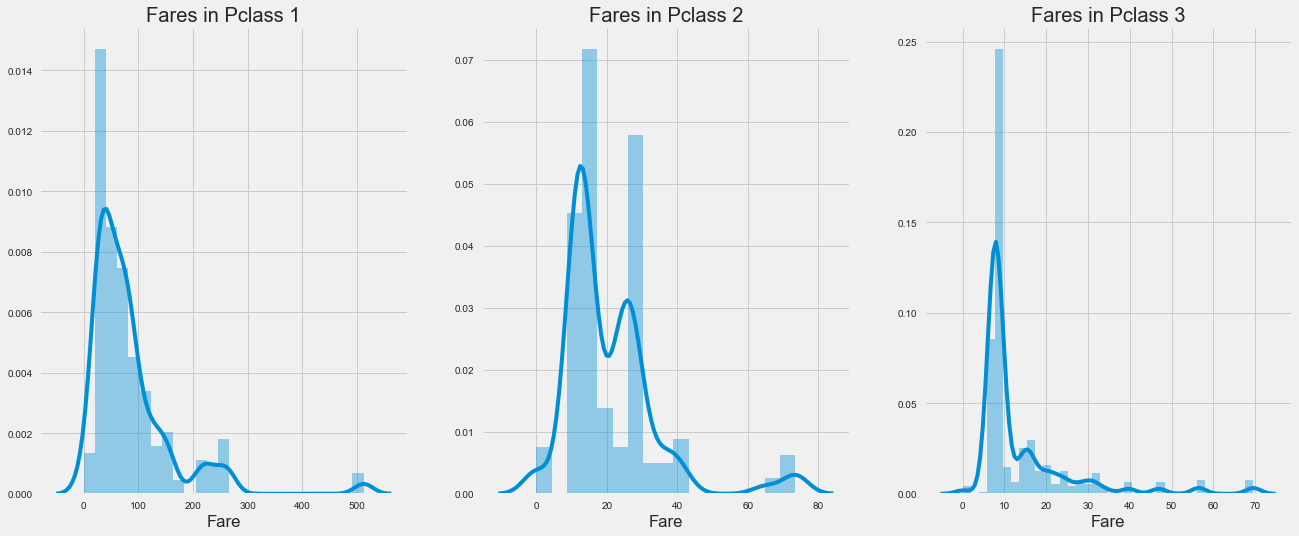

In [166]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

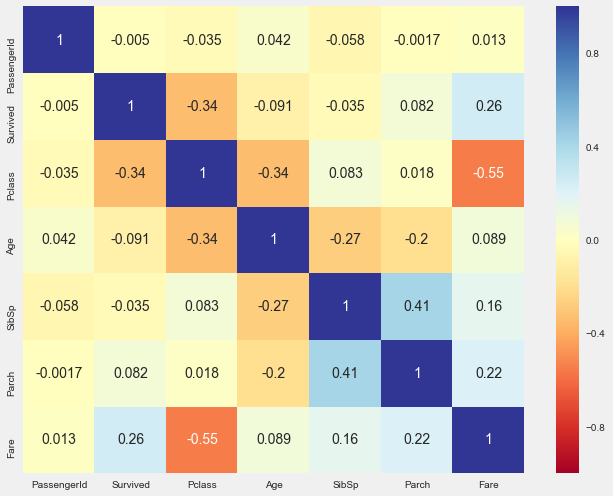

In [167]:
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')
fig=plt.gcf()
fig.set_size_inches(10,8)

In [168]:
df['Age_ctg'] = 0
df.loc[df['Age']<=16,'Age_ctg']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_ctg']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_ctg']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_ctg']=3
df.loc[df['Age']>64,'Age_ctg']=4
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,init,Age_ctg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [169]:
df['Age_ctg'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_ctg
1,382
2,325
0,104
3,69
4,11


In [170]:
pd.crosstab(df['Age_ctg'],df['Survived'],margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Age_ctg,,,
0,47,57,104
1,232,150,382
2,221,104,325
3,39,30,69
4,10,1,11
All,549,342,891


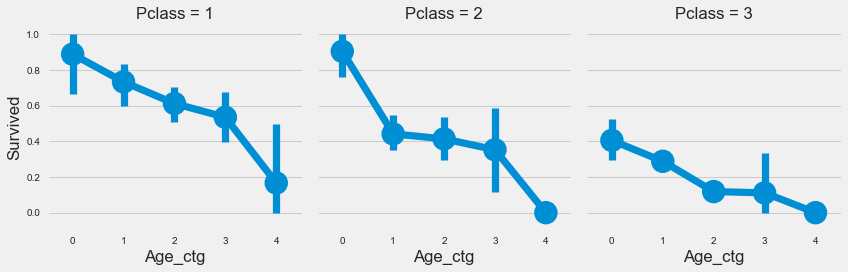

In [171]:
sns.factorplot('Age_ctg','Survived',data=df,col='Pclass')

In [172]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1

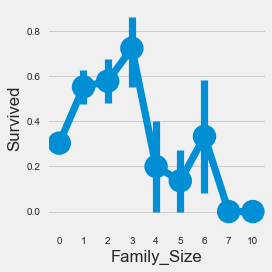

In [173]:
sns.factorplot('Family_Size','Survived',data=df)

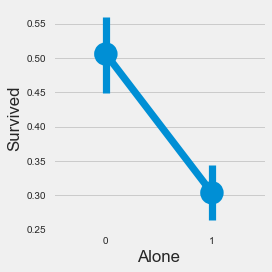

In [174]:
sns.factorplot('Alone','Survived',data=df)

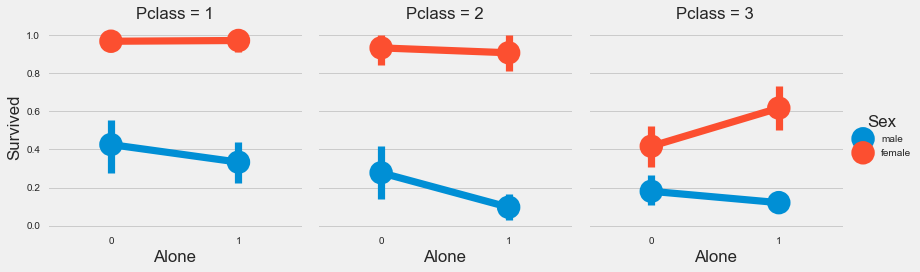

In [175]:
sns.factorplot('Alone','Survived',hue='Sex',col='Pclass',data=df)

In [176]:
df['FareCateg']=pd.qcut(df['Fare'], 4)

In [177]:
df.groupby(['FareCateg'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
FareCateg,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [178]:
df['Fare_cat']=0
df.loc[df['Fare']<=7.91,'Fare_cat']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_cat']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare_cat']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'Fare_cat']=3

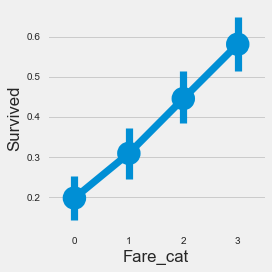

In [179]:
sns.factorplot('Fare_cat','Survived',data=df)

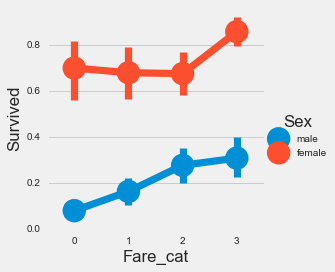

In [180]:
sns.factorplot('Fare_cat','Survived',hue='Sex',data=df)

In [181]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [182]:
df['TitleCode'] = label.fit_transform(df['init'])
df['SexCode'] = label.fit_transform(df['Sex'])
df['EmbarkedCode'] = label.fit_transform(df['Embarked'])

In [183]:
dfo=df.copy(deep=True)

In [184]:
df=df[['SexCode','Pclass', 'EmbarkedCode', 'TitleCode','Family_Size','Age_ctg','Fare_cat','Survived']]
df.head()

,SexCode,Pclass,EmbarkedCode,TitleCode,Family_Size,Age_ctg,Fare_cat,Survived
0,1,3,2,2,1,1,0,0
1,0,1,0,3,1,2,3,1
2,0,3,2,1,0,1,1,1
3,0,1,2,3,1,2,3,1
4,1,3,2,2,0,2,1,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text yticklabel objects>)

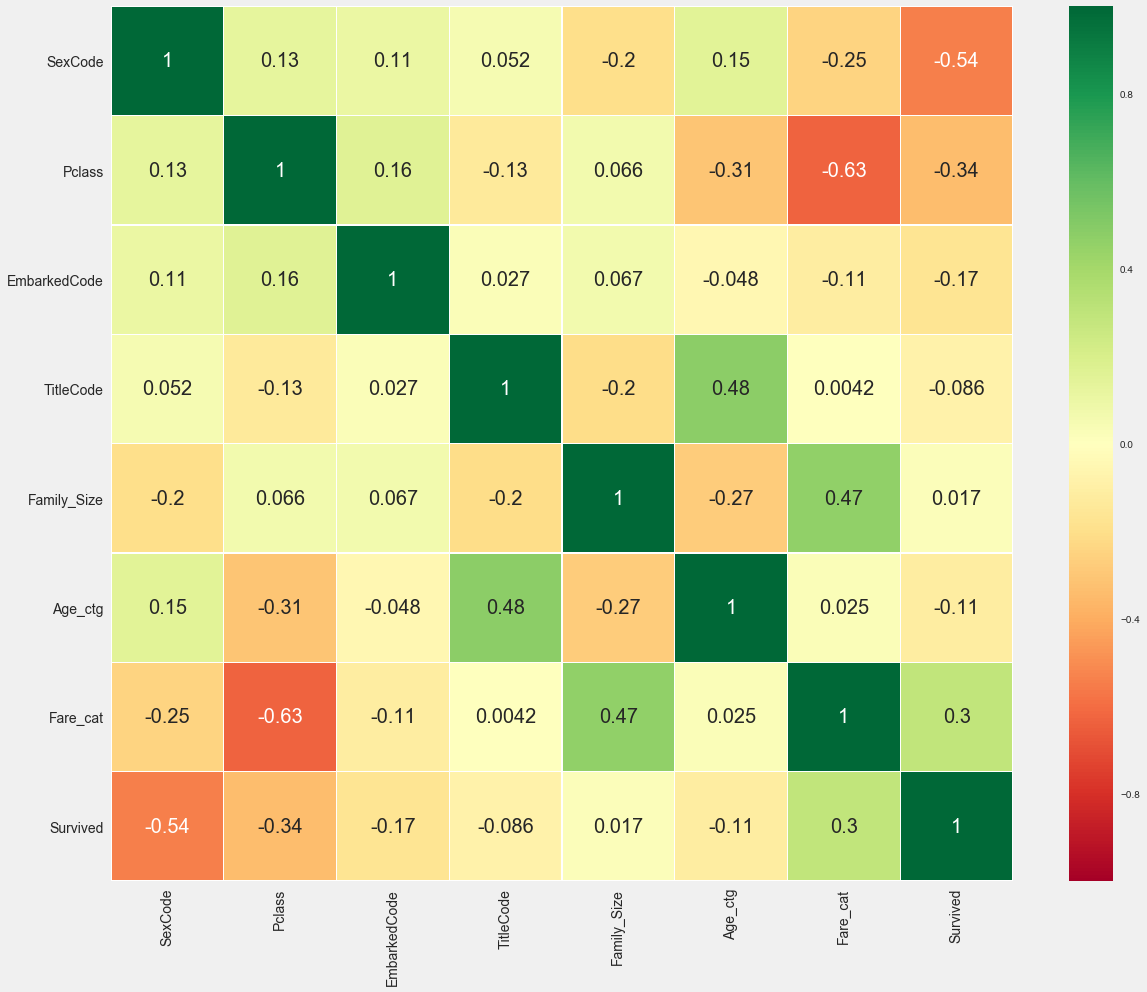

In [186]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [188]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier

In [189]:
models = [LogisticRegression(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),XGBClassifier()]

In [190]:
for model in models:
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print(type(model))
    print(confusion_matrix(y_test,prediction))
    print(accuracy_score(y_test,prediction))
    print()

<class 'sklearn.linear_model.logistic.LogisticRegression'>
[[132  22]
 [ 40  74]]
0.768656716418

<class 'sklearn.svm.classes.SVC'>
[[138  16]
 [ 35  79]]
0.809701492537

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
[[136  18]
 [ 38  76]]
0.791044776119

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
[[131  23]
 [ 28  86]]
0.809701492537

<class 'sklearn.naive_bayes.GaussianNB'>
[[125  29]
 [ 27  87]]
0.791044776119

<class 'sklearn.tree.tree.DecisionTreeClassifier'>
[[134  20]
 [ 40  74]]
0.776119402985

<class 'xgboost.sklearn.XGBClassifier'>
[[143  11]
 [ 41  73]]
0.805970149254



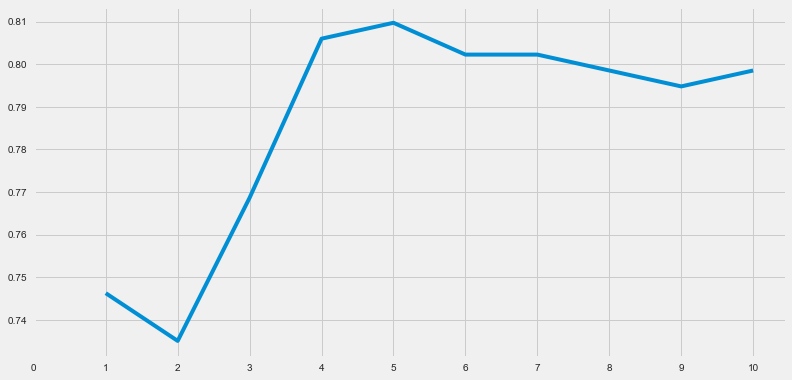

Accuracies for different values of n are: [ 0.74626866  0.73507463  0.76865672  0.80597015  0.80970149  0.80223881
  0.80223881  0.79850746  0.79477612  0.79850746] with the max value as  0.809701492537


In [197]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [199]:
model=SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.813432835821


In [204]:
df1 = pd.read_csv('test.csv')